<a name="load-data-and-specify-variables"></a>
## Load Data and Specify Variables

In this section we will load our dataset, print the index of each feature and then specify which variables are predictors, target, controls (optional), and weight (optional). For variables with null values, null_value_cleanup will create IS_NULL indicator variables. If you prefer another method of dealing with missing values, like imputing values (e.g. mean, median, mode), write a function to do it, put it in EDATools, and call it below. 

In [1]:
import EDATools
import ModelTools
import pandas as pd
import numpy as np
import warnings
import statsmodels.api as sm

dataset = sm.datasets.get_rdataset("Schooling", "Ecdat").data

EDATools.null_value_cleanup(dataset)

# Print the index of each feature.
for i, col in enumerate(dataset.columns):
    print(i, col)

/home/homer/anaconda4/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


0 smsa66
1 smsa76
2 nearc2
3 nearc4
4 nearc4a
5 nearc4b
6 ed76
7 ed66
8 age76
9 daded
10 nodaded
11 momed
12 nomomed
13 momdad14
14 sinmom14
15 step14
16 south66
17 south76
18 lwage76
19 famed
20 black
21 wage76
22 enroll76
23 kww
24 kww_ISNULL
25 iqscore
26 iqscore_ISNULL
27 mar76
28 libcrd14
29 exp76


Set index of predictors, target, controls, weight.

In [2]:
predictors = np.array([2,3,6,7,8,9,10,11,12,14,15,20,23,25,27,28,29])
numeric_cat_index = np.array([2,3,10,12,14,15,20,27,28])
target = 21

<a name="one-hot-encode-categorical-variables"></a>
## One Hot Encode Categorical Variables

For the purpose of modeling we will one-hot encode each categorical variable. We will also re-name our features so that categorical variables follow the convention VariableName-LevelName. This will allow us to keep track of variable level characteristics, in particular variable importance.

In [3]:
dataset_enc = ModelTools.CreateDummyVars(dataset,predictors,target,numeric_cat_index)

In [4]:
for i, col in enumerate(dataset_enc.columns):
    print(i, col)

0 nearc2-no
1 nearc2-yes
2 nearc4-no
3 nearc4-yes
4 nodaded-no
5 nodaded-yes
6 nomomed-no
7 nomomed-yes
8 sinmom14-no
9 sinmom14-yes
10 step14-no
11 step14-yes
12 black-no
13 black-yes
14 mar76-2
15 mar76-3
16 mar76-4
17 mar76-5
18 mar76-6
19 mar76-Null_Value
20 mar76-yes
21 libcrd14-Null_Value
22 libcrd14-no
23 libcrd14-yes
24 ed76
25 ed66
26 age76
27 daded
28 momed
29 kww
30 iqscore
31 exp76
32 wage76


Split the data into a training and validation set, with the validation set containing p_val_size (defaulted to 0.2) portion of the data.

In [5]:
warnings.filterwarnings('ignore')

predictors_enc = np.arange(32)
target_enc = 32
 
X_train, X_val, Y_train, Y_val = ModelTools.TrainHoldSplit(dataset_enc,predictors_enc,target_enc,p_val_size=0.25)

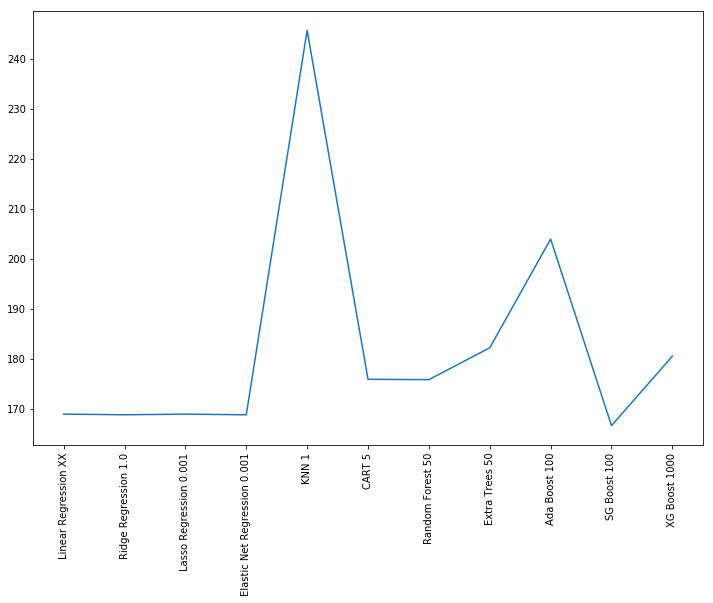

                           Model       Score
9                   SG Boost 100  166.654619
3   Elastic Net Regression 0.001  168.827198
1           Ridge Regression 1.0  168.833047
2         Lasso Regression 0.001  168.959466
0           Linear Regression XX  168.961526
6               Random Forest 50  175.861780
5                         CART 5  175.932285
10                 XG Boost 1000  180.556024
7                 Extra Trees 50  182.230890
8                  Ada Boost 100  203.988844
4                          KNN 1  245.760956


In [6]:
#warnings.filterwarnings('ignore')

import ModelToolBox.ModelComparison as MC

MC.model_comparison_regression_stdset(p_X_train = X_train,
                                    p_X_val = X_val,
                                    p_Y_train = Y_train,
                                    p_Y_val = Y_val,
                                    p_predictors = predictors_enc,
                                    p_metric = 'L1')   